### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Twitter-Absolute-Sigma-500.data',header = None)

In [4]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Buzz']

In [5]:
data.head(10)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.000000,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.000000,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.000000,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.000000,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.000000,169,98,101,90,96,95,185,1.0
5,775,765,935,806,912,1095,1198,614,588,751,...,1.0,1.000000,775,765,935,806,912,1095,1198,1.0
6,469,1092,332,354,357,676,1189,348,909,261,...,1.0,1.000000,469,1092,332,354,357,676,1189,1.0
7,818,693,756,1099,877,871,1409,578,516,546,...,1.0,1.000000,818,693,756,1099,877,871,1409,1.0
8,832,628,898,944,993,983,1037,543,432,627,...,1.0,1.000000,832,628,898,944,993,983,1037,1.0
9,920,1071,833,662,851,1096,1067,659,790,601,...,1.0,1.013109,920,1071,833,662,851,1096,1068,1.0


#  CHECK NULL VALUES

In [6]:
data.isnull().any().sum()

0

In [7]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [8]:
data.columns

Index(['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0',
       'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1',
       'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6', 'BL_0',
       'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1',
       'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1',
       'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 'CS_0',
       'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4',
       'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5',
       'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6',
       'Buzz'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

# Correlation OF Features For Both Classes

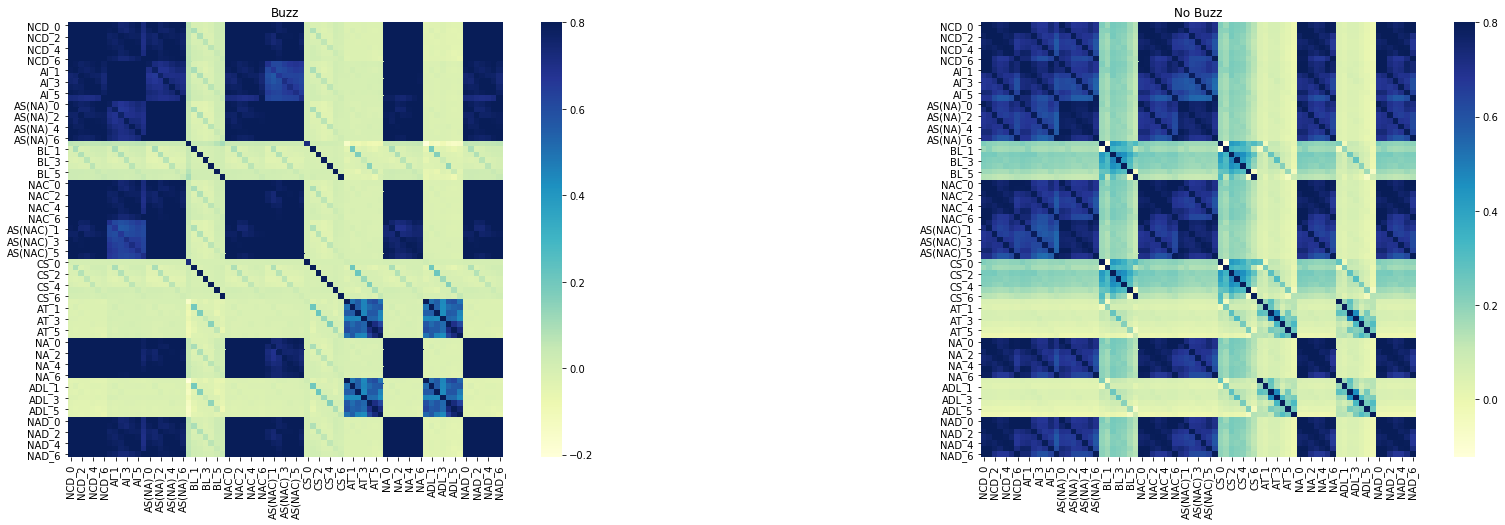

In [10]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =(30, 8))

sns.heatmap(data.query('Buzz==1').drop(['Buzz'],1).corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Buzz')

sns.heatmap(data.query('Buzz==0').drop(['Buzz'],1).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('No Buzz')

plt.show()

# Check Class Imbalance

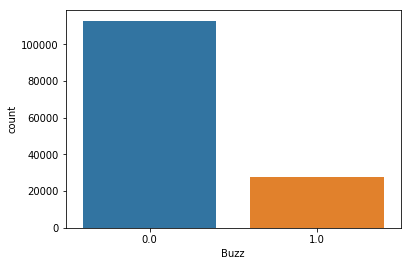

In [11]:
# Now lets check the class distributions for class imbalance 
sns.countplot('Buzz',data=data)
plt.show()

In [12]:
# now let us check in the number of Percentage
Count_Buzz = len(data[data["Buzz"]==1]) 
Count_No_Buzz = len(data[data["Buzz"]==0]) 
Percentage_of_Buzz = Count_Buzz/(Count_Buzz+Count_No_Buzz)
print("percentage of buzz is",Percentage_of_Buzz*100)
Percentage_of_No_Buzz= Count_No_Buzz/(Count_Buzz+Count_No_Buzz)
print("percentage of no buzz",Percentage_of_No_Buzz*100)

percentage of buzz is 19.739600730596205
percentage of no buzz 80.26039926940379


# Since the dataset has a class imbalance problem, we cannot use Accuracy as a model evaluation metric because it is misleading. We need to use F1 score as an evaluation metric as we want a good precision(Low False Positive) and good recall (Low False negative). So a model having a higher F1 score will be the better model

In [12]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1,random_state = 0)

In [14]:
#As dataset is taking more time for SVM models we will take 5% of sample data
from sklearn.model_selection import train_test_split
_, sample_data_svm, _, sample_target_svm = train_test_split(X, y, shuffle = True, test_size = 0.05,random_state = 0)

In [15]:
sample_data.shape

(14071, 77)

In [16]:
sample_target.shape

(14071,)

In [17]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target,random_state = 0, test_size = 0.2)

In [18]:
#For SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(sample_data_svm,sample_target_svm,random_state = 0,test_size = 0.2)

# Distribution of Features

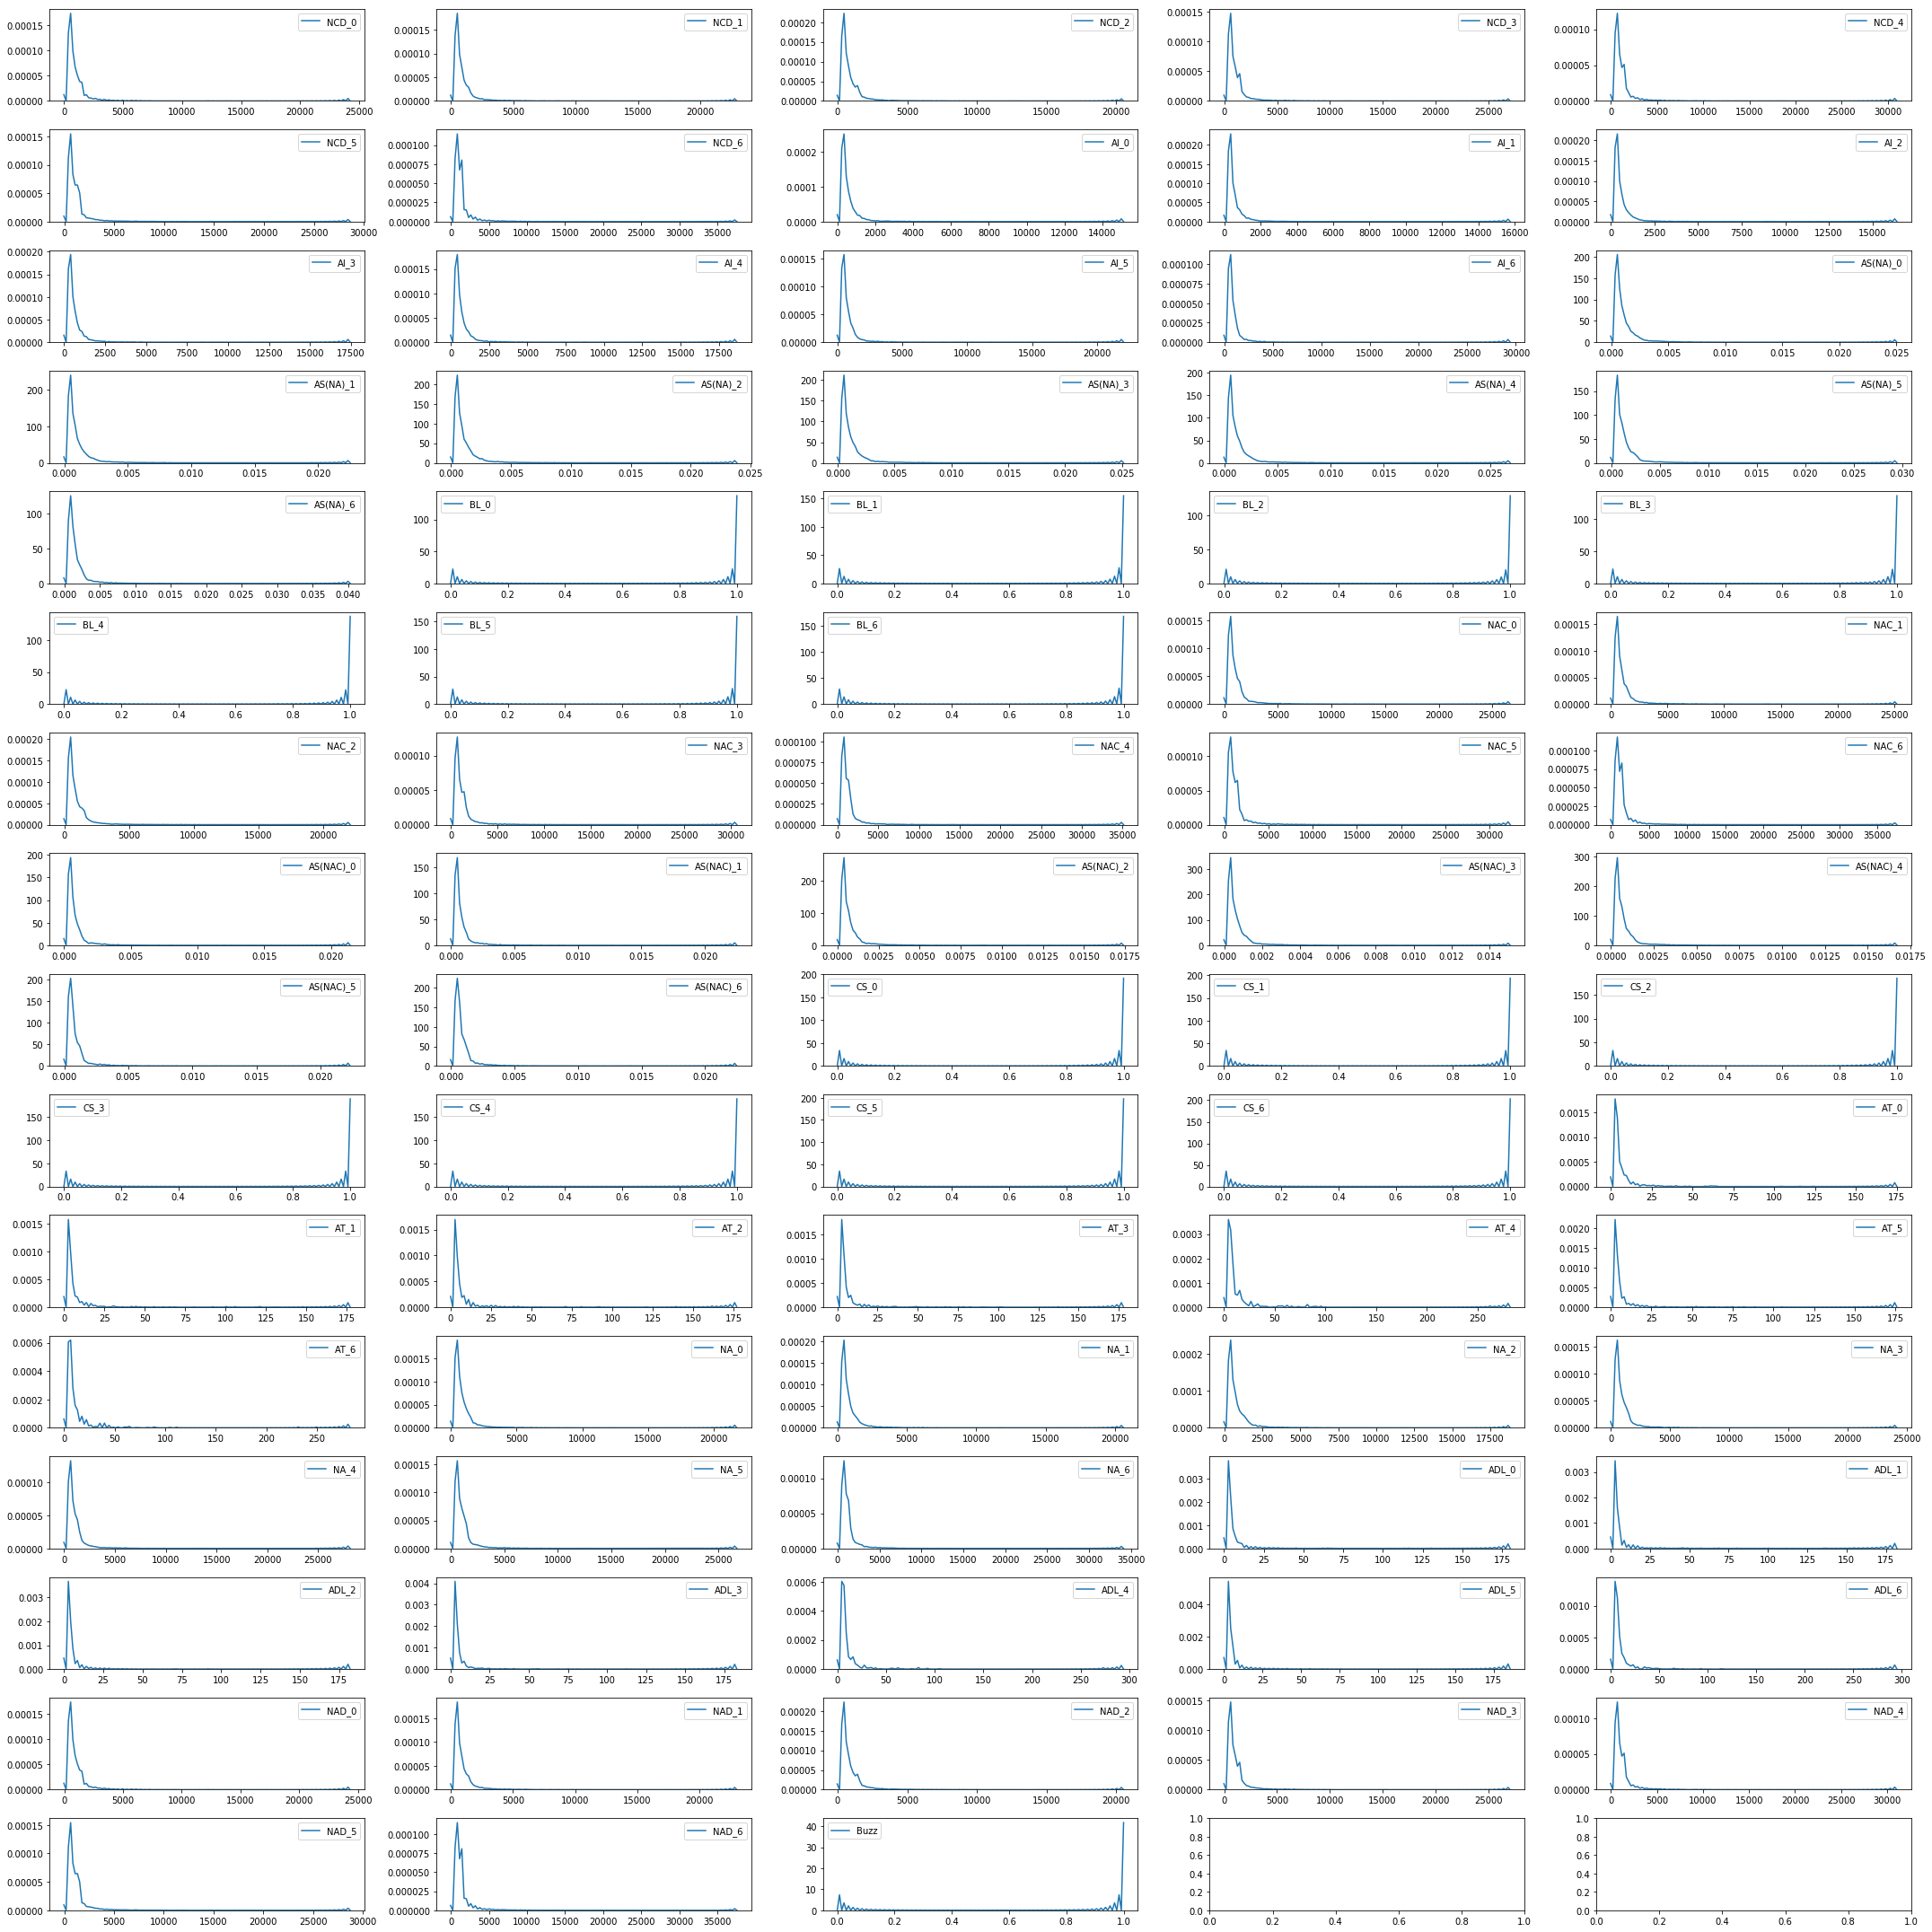

In [19]:
colnames = pd.Series(data.columns)
fig, axs = plt.subplots(16,5, figsize=(30, 30), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in colnames.index.values:
    sns.kdeplot(data[colnames[i]], ax=axs[i])
    fig.tight_layout()
plt.show()

# Data is not normally distributed within each feature, so standard scaler is not the best scaler to use. We have to use min max scaler which is suited for such non gaussian distributions 

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

# KNN Model

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_knn = {'n_neighbors':[1, 5, 10, 15, 20]} 
print("Parameter grid:\n{}".format(param_knn))
grid_knn = GridSearchCV(knn, param_grid=param_knn, cv = 5, scoring= 'f1')

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


In [23]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [24]:
print("Best parameters: {}".format(grid_knn.best_params_))

Best parameters: {'n_neighbors': 5}


In [25]:
print("Training Score: {}".format(grid_knn.score(X_train, y_train)))
print("Testing Score: {}".format(grid_knn.score(X_test, y_test)))

Training Score: 0.9217940049583051
Testing Score: 0.8946395563770795


In [26]:
from sklearn.metrics import roc_auc_score
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.95 


<IPython.core.display.Javascript object>


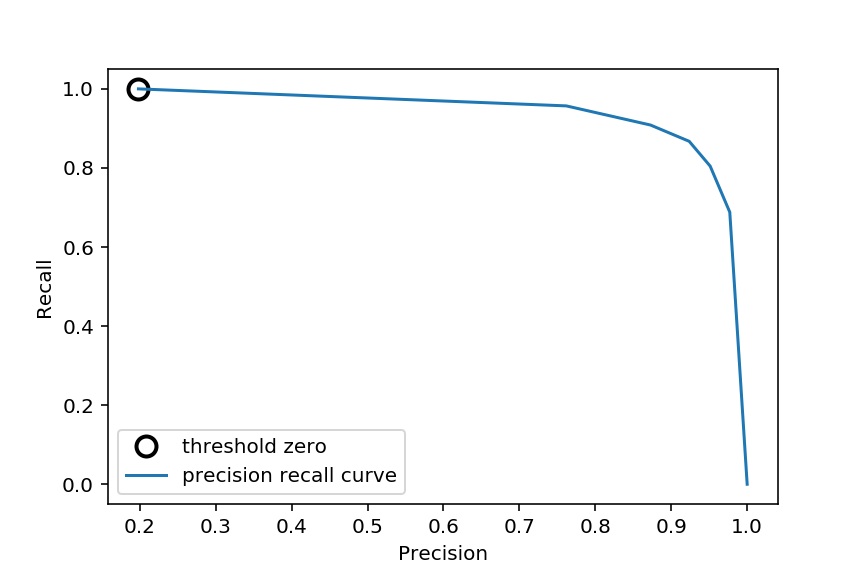

In [70]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook

precision, recall, thresholds = precision_recall_curve(y_test,grid_knn.predict_proba(X_test)[:, 1])

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [28]:
report_table = []
report_table = [['knn', 'k = 20', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test)]]
report_table

[['knn',
  'k = 20',
  0.9217940049583051,
  0.8946395563770795,
  0.9578425389994012,
  0.945681908296987]]

# Logistic Regression Model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0)
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty' :['l1','l2']}
print("Parameter grid:\n{}".format(param_log))
grid_log = GridSearchCV(estimator = log_model, param_grid = param_log, cv=5, scoring= 'f1', return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}


In [30]:
import warnings
warnings.filterwarnings("ignore")
grid_log.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [31]:
print("Best parameters: {}".format(grid_log.best_params_))

Best parameters: {'C': 1000, 'penalty': 'l2'}


In [32]:
print("Training Score: {}".format(grid_log.score(X_train, y_train)))
print("Testing Score: {}".format(grid_log.score(X_test, y_test)))

Training Score: 0.9058152793614594
Testing Score: 0.8998144712430427


In [33]:
from sklearn.metrics import roc_auc_score
y_log_predict = grid_log.predict(X_test)
y_log_train_predict = grid_log.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_log_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_log_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


<IPython.core.display.Javascript object>


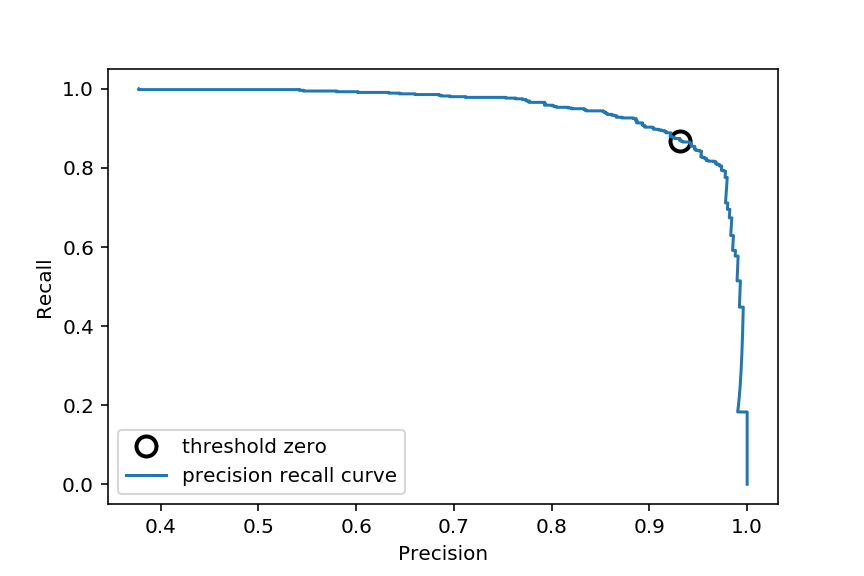

In [71]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test, grid_log.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [35]:
report_table = report_table + [['Logistic Regression', grid_log.best_params_, grid_log.score(X_train, y_train), grid_log.score(X_test, y_test), roc_auc_score(y_log_train_predict, y_train), roc_auc_score(y_log_predict, y_test)]]

# Linear SVM Model

In [36]:
from sklearn.svm import LinearSVC
model_Linear_SVM = LinearSVC(random_state=0)
param_Linear_SVM = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(param_Linear_SVM))
grid_Linear_SVM = GridSearchCV(model_Linear_SVM, param_grid = param_Linear_SVM, cv=5, scoring='f1', return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [37]:
grid_Linear_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [38]:
print("Best parameters: {}".format(grid_Linear_SVM.best_params_))

Best parameters: {'C': 10}


In [39]:
print("Training Score: {}".format(grid_Linear_SVM.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Linear_SVM.score(X_test, y_test)))

Training Score: 0.9012517385257302
Testing Score: 0.8959700093720712


In [40]:
from sklearn.metrics import roc_auc_score
y_linsvc_predict = grid_Linear_SVM.predict(X_test)
y_linsvc_train_predict = grid_Linear_SVM.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_linsvc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_linsvc_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.95 


<IPython.core.display.Javascript object>


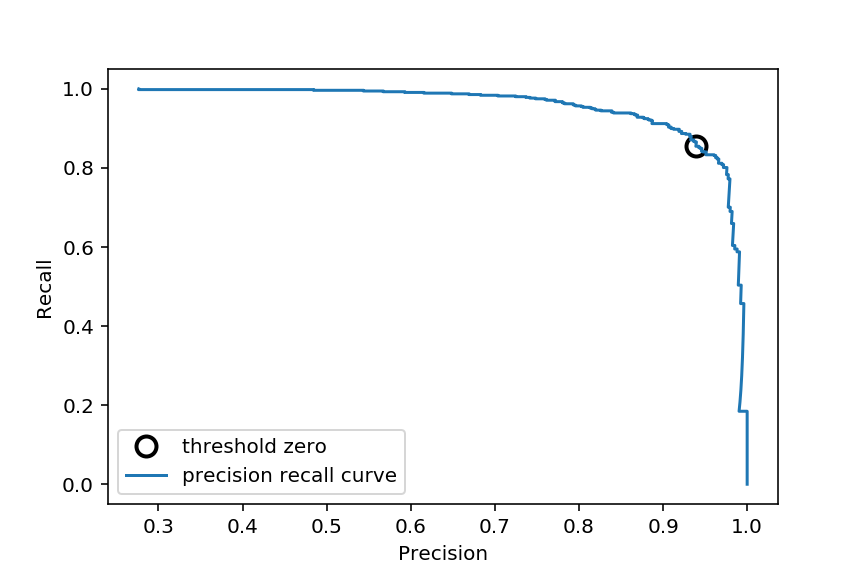

In [72]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test, grid_Linear_SVM.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [42]:
report_table = report_table + [['Linear SVM', grid_Linear_SVM.best_params_, grid_Linear_SVM.score(X_train, y_train), grid_Linear_SVM.score(X_test, y_test), roc_auc_score(y_linsvc_train_predict, y_train), roc_auc_score(y_linsvc_predict, y_test)]]

# SVM With Radial Kernel

In [43]:
from sklearn.svm import SVC
model_Radial_SVM = SVC(kernel = 'rbf',random_state=0)
param_Radial_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Radial_SVM))
grid_Radial_SVM = GridSearchCV(model_Radial_SVM, param_grid = param_Radial_SVM, cv=5,scoring='f1', return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [44]:
grid_Radial_SVM.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [45]:
print("Best parameters: {}".format(grid_Radial_SVM.best_params_))

Best parameters: {'C': 100, 'gamma': 1}


In [46]:
print("Training Score: {}".format(grid_Radial_SVM.score(X_train_svm, y_train_svm)))
print("Testing Score: {}".format(grid_Radial_SVM.score(X_test_svm, y_test_svm)))

Training Score: 0.9126478616924476
Testing Score: 0.888888888888889


In [47]:
from sklearn.metrics import roc_auc_score
y_radsvc_predict = grid_Radial_SVM.predict(X_test_svm)
y_radsvc_train_predict = grid_Radial_SVM.predict(X_train_svm)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_radsvc_train_predict, y_train_svm))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_radsvc_predict, y_test_svm))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.93 


<IPython.core.display.Javascript object>


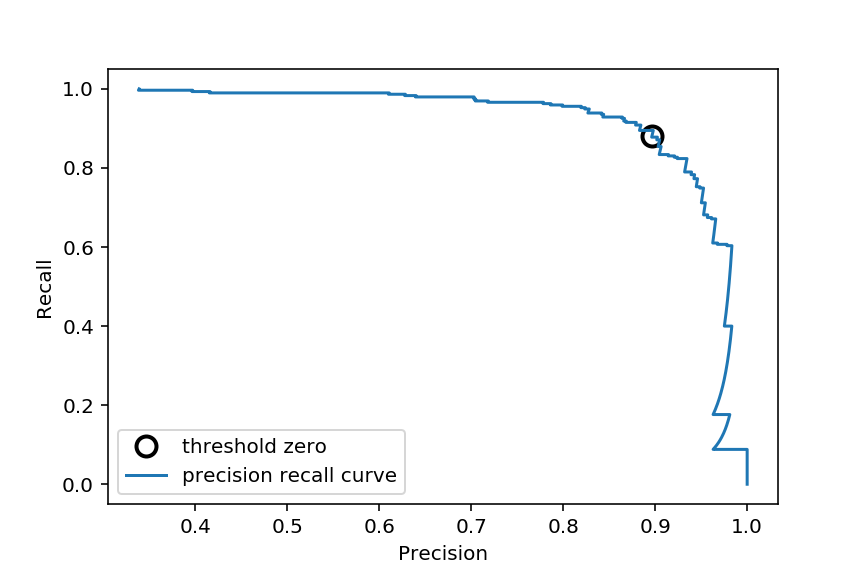

In [73]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test_svm, grid_Radial_SVM.decision_function(X_test_svm))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [49]:
report_table = report_table + [['Radial SVM', grid_Radial_SVM.best_params_, grid_Radial_SVM.score(X_train_svm, y_train_svm), grid_Radial_SVM.score(X_test_svm, y_test_svm), roc_auc_score(y_radsvc_train_predict, y_train_svm), roc_auc_score(y_radsvc_predict, y_test_svm)]]

# Polynomial SVM

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model_Poly_SVM = SVC(kernel = 'poly', degree = 2,random_state=0)
param_Poly_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Poly_SVM))
grid_Poly_SVM = GridSearchCV(model_Poly_SVM, param_grid = param_Poly_SVM,scoring='f1', cv=5, return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [51]:
grid_Poly_SVM.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [52]:
print("Best parameters: {}".format(grid_Poly_SVM.best_params_))

Best parameters: {'C': 100}


In [53]:
print("Training Score: {}".format(grid_Poly_SVM.score(X_train_svm, y_train_svm)))
print("Testing Score: {}".format(grid_Poly_SVM.score(X_test_svm, y_test_svm)))

Training Score: 0.8620689655172414
Testing Score: 0.8581952117863719


In [54]:
from sklearn.metrics import roc_auc_score
y_Polysvc_predict = grid_Poly_SVM.predict(X_test_svm)
y_Polysvc_train_predict = grid_Poly_SVM.predict(X_train_svm)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_Polysvc_train_predict, y_train_svm))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_Polysvc_predict, y_test_svm))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.94 


<IPython.core.display.Javascript object>


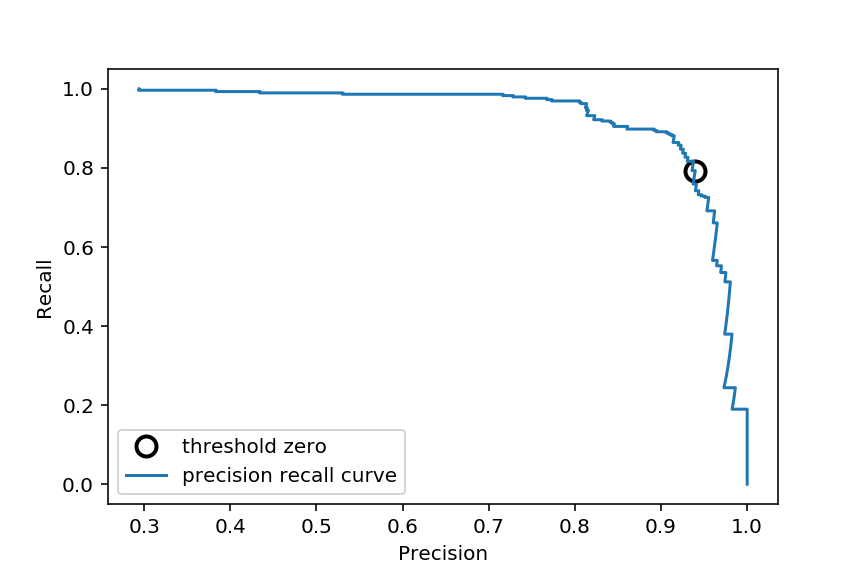

In [74]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test_svm, grid_Poly_SVM.decision_function(X_test_svm))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [56]:
report_table = report_table + [['Polynomial SVM', grid_Poly_SVM.best_params_, grid_Poly_SVM.score(X_train, y_train), grid_Poly_SVM.score(X_test_svm, y_test_svm), roc_auc_score(y_Polysvc_train_predict, y_train_svm), roc_auc_score(y_Polysvc_predict, y_test_svm)]]

# Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=0)
param_tree = {'max_depth': [1,2,3,4,5,6,7,8, 9, 10], 'criterion': ['gini','entropy']}
print("Parameter grid:\n{}".format(param_tree))
grid_dtree = GridSearchCV(model_dtree, param_grid = param_tree, cv=5,scoring='f1',return_train_score=True)

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']}


In [58]:
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [59]:
print("Best parameters: {}".format(grid_dtree.best_params_))

Best parameters: {'criterion': 'gini', 'max_depth': 3}


In [60]:
print("Training Score: {}".format(grid_dtree.score(X_train, y_train)))
print("Testing Score: {}".format(grid_dtree.score(X_test, y_test)))

Training Score: 0.9082853345148426
Testing Score: 0.8928892889288927


In [61]:
from sklearn.metrics import roc_auc_score
y_dtree_predict = grid_dtree.predict(X_test)
y_dtree_train_predict = grid_dtree.predict(X_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_dtree_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_dtree_predict, y_test))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.93 


<IPython.core.display.Javascript object>


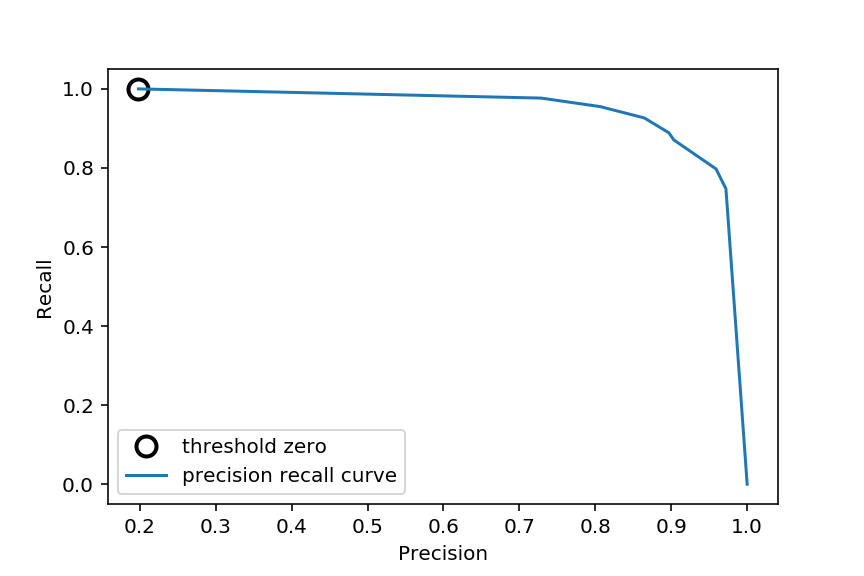

In [62]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook

precision, recall, thresholds = precision_recall_curve(y_test,grid_dtree.predict_proba(X_test)[:, 1])

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [63]:
report_table = report_table + [['Desicion Tree', grid_dtree.best_params_, grid_dtree.score(X_train, y_train), grid_dtree.score(X_test, y_test), roc_auc_score(y_dtree_train_predict, y_train), roc_auc_score(y_dtree_predict, y_test)]]

In [64]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Best Parameters', 'Train F1 Score', 'Test F1 Score', 'Train auc score', 'Test auc score'])

In [65]:
report.index = report['Model name']
report

,Model name,Best Parameters,Train F1 Score,Test F1 Score,Train auc score,Test auc score
Model name,,,,,,
knn,knn,k = 20,0.921794,0.894640,0.957843,0.945682
Logistic Regression,Logistic Regression,"{'C': 1000, 'penalty': 'l2'}",0.905815,0.899814,0.952290,0.950442
Linear SVM,Linear SVM,{'C': 10},0.901252,0.895970,0.956053,0.952202
Radial SVM,Radial SVM,"{'C': 100, 'gamma': 1}",0.912648,0.888889,0.955977,0.932623
Polynomial SVM,Polynomial SVM,{'C': 100},0.865394,0.858195,0.945492,0.943034
Desicion Tree,Desicion Tree,"{'criterion': 'gini', 'max_depth': 3}",0.908285,0.892889,0.943083,0.934758


# Best Model Based On F1 score we have to choose between KNN and Logistic Regression. The Test F1 scores  are almost same for the two. So we will also consider the Train F1 score. KNN is better than Logistic on the train data. So overall KNN regressor is the best model as it performs the better on the Training set as well as Test set. 